In [34]:
import re
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.cluster.util import cosine_distance

MULTIPLE_WHITESPACE_PATTERN = re.compile(r"\s+", re.UNICODE)


def normalize_whitespace(text):
    """
    Translates multiple whitespace into single space character.
    If there is at least one new line character chunk is replaced
    by single LF (Unix new line) character.
    """
    return MULTIPLE_WHITESPACE_PATTERN.sub(_replace_whitespace, text)


def _replace_whitespace(match):
    text = match.group()

    if "\n" in text or "\r" in text:
        return "\n"
    else:
        return " "


def is_blank(string):
    """
    Returns `True` if string contains only white-space characters
    or is empty. Otherwise `False` is returned.
    """
    return not string or string.isspace()


def get_symmetric_matrix(matrix):
    """
    Get Symmetric matrix
    :param matrix:
    :return: matrix
    """
    return matrix + matrix.T - np.diag(matrix.diagonal())


def core_cosine_similarity(vector1, vector2):
    """
    measure cosine similarity between two vectors
    :param vector1:
    :param vector2:
    :return: 0 < cosine similarity value < 1
    """
    return 1 - cosine_distance(vector1, vector2)


'''
Note: This is not a summarization algorithm. This Algorithm pics top sentences irrespective of the order they appeared.
'''


class TextRank4Sentences():
    def __init__(self):
        self.damping = 0.85  # damping coefficient, usually is .85
        self.min_diff = 1e-5  # convergence threshold
        self.steps = 100  # iteration steps
        self.text_str = None
        self.sentences = None
        self.pr_vector = None

    def _sentence_similarity(self, sent1, sent2, stopwords=None):
        if stopwords is None:
            stopwords = []

        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return core_cosine_similarity(vector1, vector2)

    def _build_similarity_matrix(self, sentences, stopwords=None):
        # create an empty similarity matrix
        sm = np.zeros([len(sentences), len(sentences)])

        for idx1 in range(len(sentences)):
            for idx2 in range(len(sentences)):
                if idx1 == idx2:
                    continue

                sm[idx1][idx2] = self._sentence_similarity(sentences[idx1], sentences[idx2], stopwords=stopwords)

        # Get Symmeric matrix
        sm = get_symmetric_matrix(sm)

        # Normalize matrix by column
        norm = np.sum(sm, axis=0)
        sm_norm = np.divide(sm, norm, where=norm != 0)  # this is ignore the 0 element in norm

        return sm_norm

    def _run_page_rank(self, similarity_matrix):

        pr_vector = np.array([1] * len(similarity_matrix))

        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr_vector = (1 - self.damping) + self.damping * np.matmul(similarity_matrix, pr_vector)
            if abs(previous_pr - sum(pr_vector)) < self.min_diff:
                break
            else:
                previous_pr = sum(pr_vector)

        return pr_vector

    def _get_sentence(self, index):

        try:
            return self.sentences[index]
        except IndexError:
            return ""

    def get_sentences(self):
        sentences = []

        for i in range(len(self.pr_vector)):
            sentences.append([self.pr_vector[i]])

        return sentences

    def analyze(self, text, stop_words=None):
        self.text_str = text
        self.sentences = sent_tokenize(self.text_str)

        tokenized_sentences = [word_tokenize(sent) for sent in self.sentences]

        similarity_matrix = self._build_similarity_matrix(tokenized_sentences, stop_words)
        
        self.pr_vector = self._run_page_rank(similarity_matrix)
        
        return similarity_matrix

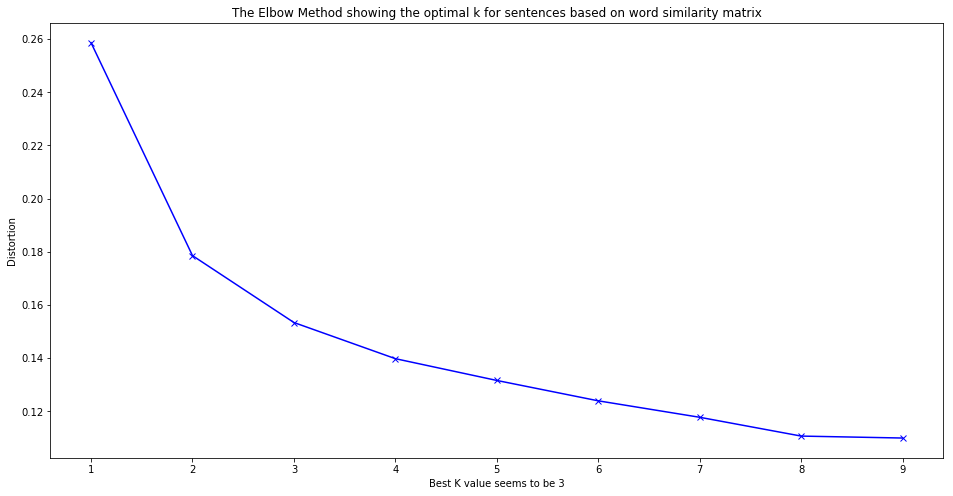

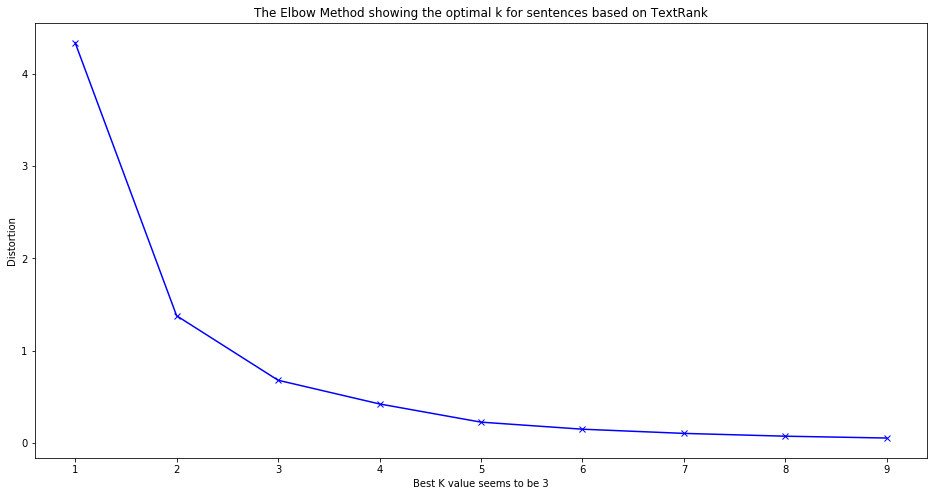

Valitud meetodite ülekattuvusprotsent on 78.12%


,cluster,TextRank,sentence
0,1,0.150000,﻿Kallid kaasmaalased!
1,1,0.690322,Me elame murrangute ajal.
2,2,1.308348,"Eestimaa on kiiresti muutumas monokultuurseks, intensiivne põllumajandus kaotab senised aasad, nurmed, kaovad liigirikkad niidud, kaovad paljud taimed, linnud ja liblikad."
3,2,1.197755,"See pole ainult esteetiline, vaid ka tõsine ökoloogiline probleem."
4,2,1.149178,"Tegemist on ökokriisiga, mis mõjutab meid kõiki mitmel viisil."
5,2,1.431935,"Oma osa selle ökokriisi süvenemisel on meil kõigil, kes me oma kodumuru, koduaeda püüame ülemäära korda teha, niita, kaotada kõik, mida peame umbrohuks, olgu võililled või nõgesed."
6,0,0.949355,On aeg muuta oma suhtumist.
7,1,0.471145,Nii kirjutas Jaan Kaplinski ajalehes Sirp 7. novembril 2014 ilmunud artiklis „Pügatud Eestimaa“.
8,2,1.057232,"Siis ei olnud veel alustanud Greta Thunberg oma streike, polnud avalikkuse teadvusse jõudnud mesinike jõuetu viha massidena mürgitatud mesilaste pärast, kuuendast väljasuremislainest ja kliimakatastroofist räägiti peamiselt teadusajakirjades, lageraiete vastu võitlemise üldrahvalikuks muutumine seisis alles ees."
9,0,0.885076,"Kui kuus aastat tagasi tundus kirjaniku sõnum hüüdja häälena kõrbes, siis praegu on valusad faktid jõudnud massimeedia kaudu pea kõigi inimesteni ning tekitanud kogu olemasolule ebameeldiva hirmu ja kõheduse fooni."


,cluster,TextRank,sentence
0,1,0.150000,﻿Kallid kaasmaalased!
1,1,0.690322,Me elame murrangute ajal.
2,2,1.308348,"Eestimaa on kiiresti muutumas monokultuurseks, intensiivne põllumajandus kaotab senised aasad, nurmed, kaovad liigirikkad niidud, kaovad paljud taimed, linnud ja liblikad."
3,2,1.197755,"See pole ainult esteetiline, vaid ka tõsine ökoloogiline probleem."
4,2,1.149178,"Tegemist on ökokriisiga, mis mõjutab meid kõiki mitmel viisil."
5,2,1.431935,"Oma osa selle ökokriisi süvenemisel on meil kõigil, kes me oma kodumuru, koduaeda püüame ülemäära korda teha, niita, kaotada kõik, mida peame umbrohuks, olgu võililled või nõgesed."
6,0,0.949355,On aeg muuta oma suhtumist.
7,1,0.471145,Nii kirjutas Jaan Kaplinski ajalehes Sirp 7. novembril 2014 ilmunud artiklis „Pügatud Eestimaa“.
8,0,1.057232,"Siis ei olnud veel alustanud Greta Thunberg oma streike, polnud avalikkuse teadvusse jõudnud mesinike jõuetu viha massidena mürgitatud mesilaste pärast, kuuendast väljasuremislainest ja kliimakatastroofist räägiti peamiselt teadusajakirjades, lageraiete vastu võitlemise üldrahvalikuks muutumine seisis alles ees."
9,0,0.885076,"Kui kuus aastat tagasi tundus kirjaniku sõnum hüüdja häälena kõrbes, siis praegu on valusad faktid jõudnud massimeedia kaudu pea kõigi inimesteni ning tekitanud kogu olemasolule ebameeldiva hirmu ja kõheduse fooni."


In [77]:
from estnltk import Text
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 9999)

import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from IPython.display import display


def is_text(word):
    return len(set(word["analysis"][0]["partofspeech"]) & set(['Z'])) < 1

def is_substantive(word):
    return len(set(word["analysis"][0]["partofspeech"]) & set(['S'])) > 0

def is_adjective_or_substantive(word):
    return len(set(word["analysis"][0]["partofspeech"]) & set(['S', 'A'])) > 0

stop_words = [x.strip() for x in open("estonian-stopwords-lemmas.txt", "r", encoding="utf-8").readlines()]
set_stop_words = set(stop_words)

def k_means(df, name):
    distortions = []
    model = None
    best = None
    K = range(1,10)
    
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        if k == 3:
            model = kmeanModel
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Best K value seems to be 3')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k for ' + name)
    plt.show()
    
    return model
    
def table(kmeanX, given_sentences, text_rank_X):
    cluster_map = pd.DataFrame()
    cluster_map['cluster'] = kmeanX.labels_
    cluster_map['TextRank'] = [x[0] for x in text_rank_X]
    cluster_map['sentence'] = given_sentences
    display(cluster_map)

def get_dataframe(X):
    return pd.DataFrame(
        data=X,
        index=["row" + str(i) for i in range(len(X))],
        columns=["column" + str(i) for i in range(len(X[0]))]
    )
    
    
def method_generator(text):
    lemma_text = ""
    
    for word in text.words:
        lemma = word["analysis"][0]["lemma"]
        lemma_text += lemma + " "
    
    tr4sh = TextRank4Sentences()
    similarity_X = tr4sh.analyze(lemma_text)
    kmeans_similarity_X = k_means(similarity_X,  "sentences based on word similarity matrix")
    
    text_rank_X = tr4sh.get_sentences()
    kmeans_text_rank_X = k_means(text_rank_X, "sentences based on TextRank")
    
    percent = sum([kmeans_similarity_X.labels_[x]==kmeans_text_rank_X.labels_[x] for x in range(len(kmeans_text_rank_X.labels_))]) / len(kmeans_text_rank_X.labels_)
    print("Valitud meetodite ülekattuvusprotsent on " + str(round(percent * 100, 2)) + "%")
    
    table(kmeans_similarity_X, text.sentence_texts, text_rank_X)
    table(kmeans_text_rank_X, text.sentence_texts, text_rank_X)
    

with open("artikkel_voru_linna_lehest.txt", "r", encoding="utf-8") as f:
    text = Text("\n".join(f.readlines())).tag_analysis()
    method_generator(text)

Hinnang:

---

Lõppkokkuvõteks
 - Sai klasterdatud nii TextRank'i kuid ka sentence similarity algoritmi alusel ning ülekattuvusprotsent tuli neil 80%, mis on oodatust kõrgem.
 - Teemad jaotusid klastritest järgmiselt:
 - klaster 0: loodus
 - klaster 1: poliitika
 - klaster 2: inimesed
 - lugeja võib mõtliskleda, et mis võiksid olla antud klastrite sisesed võtmesõnad, et kindel olla teemade jaotumises
 - Klastreid sai hinnatud küünarnuki meetodiga ning õige klastrite arv sai valitud visuaalse menetlemise tagajärjel